In [1]:
import pandas as pd
import MFLibrary as mf
import matplotlib.pyplot as plt
import sqlite3



In [2]:
diff3 = pd.read_csv('data/run_calculation_diff3.csv')

In [3]:
conn = sqlite3.connect('C:\Dropbox\Dropbox\HAXz\CBBTO\data\cbb.db')
curr = conn.cursor()
# Exclude free throws (give inf deltaScore will still be accounted for in runs) and bad data
# end of halfs/OT (time < 90) handled elsewhere because we want to ensure that periods are ended to the best of our abilities (could be problematic in OT)
data = pd.read_sql_query("""SELECT rowid,*
                        FROM playbyplay
                        WHERE LOWER(event) not like '%free throw%'
                        AND LOWER(event) not like '% missed %'
                        AND LOWER(event) not like '% rebound%'
                        AND LOWER(event) not like '% steal%'
                        AND gameid not in ('253240066', '253510006', '260692440', '283190221',
                        '283192166', '283190201', '293170264', '283342390', '293172633')""", conn)
conn.close()

data = data.apply(pd.to_numeric,errors='ignore')

In [4]:
data.head(30)

,rowid,gameid,event,team1,team2,score1,score2,time
0,7,253130183,Demetris Nichols made Three Point Jumper.,COR,SYR,0,3,1157
1,12,253130183,Foul on Andrew Naeve,COR,SYR,0,3,1130
2,29,253130183,Louie McCroskey made Two Point Layup.,COR,SYR,0,5,1036
3,34,253130183,Darryl Watkins made Two Point Layup.,COR,SYR,0,7,988
4,36,253130183,Foul on Andrew Naeve,COR,SYR,0,7,966
5,41,253130183,Foul on Gerry McNamara,COR,SYR,0,9,960
6,44,253130183,Official TV Timeout.,COR,SYR,2,9,948
7,49,253130183,Foul on Ryan Rourke,COR,SYR,2,9,923
8,60,253130183,Foul on Ryan Rourke,COR,SYR,2,11,866
9,65,253130183,Adam Gore made Two Point Jumper.,COR,SYR,4,11,814


In [5]:
runs = diff3.loc[(diff3.scorediffdelta > 6) | (diff3.scorediffdelta < -6)]

In [6]:
runs.head()

,Unnamed: 0,rowid,gameid,event,scorediff,time,timedelta,scorediffdelta,normedscorediffdelta
15,23,168,253130183,Ryan Rourke made Two Point Layup.,-2,1068,99.0,7.0,4.242424
22,30,215,253130183,Adam Gore made Three Point Jumper.,4,720,108.0,9.0,5.000000
23,31,227,253130183,Lenny Collins made Three Point Jumper.,5,591,218.0,7.0,1.926606
42,54,405,253120183,Gerry McNamara made Three Point Jumper.,-15,307,364.0,-9.0,-1.483516
46,64,488,253120183,Eric Devendorf made Two Point Layup.,-24,904,276.0,-7.0,-1.521739


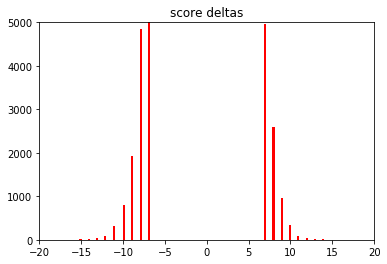

In [7]:
fig = plt.figure()
plt.ylim([0,5000])
plt.xlim([-20,20])
#plt.hist(test['delta1'],bins=20, label='team2')
#plt.hist(test['delta2'], bins=20, color='y', alpha= 0.5, label='team2')
plt.hist(runs['scorediffdelta'], bins=250, color='r', alpha=1, label='diff')
plt.title("score deltas")
plt.show()

In [17]:
for i,row in runs.iterrows():
    print(data.loc[data['rowid'].between(row['rowid']-10,row['rowid']+10)])
    #print(data.loc[data.rowid == row['rowid']])
    break

165
    rowid     gameid                                   event team1 team2  \
45    158  253130183     Andrew Naeve made Two Point Jumper.   COR   SYR   
46    162  253130183      Adam Gore made Three Point Jumper.   COR   SYR   
47    167  253130183                Foul on Terrence Roberts   COR   SYR   
48    168  253130183       Ryan Rourke made Two Point Layup.   COR   SYR   
49    171  253130183  Demetris Nichols made Two Point Layup.   COR   SYR   
50    175  253130183                  Syracuse Full Timeout.   COR   SYR   
51    176  253130183   Gerry McNamara made Two Point Jumper.   COR   SYR   

    score1  score2  time  
45      30      37  1159  
46      33      37  1106  
47      33      37  1082  
48      35      37  1068  
49      35      39  1050  
50      35      39  1019  
51      35      41   997  


In [35]:
for i,row in runs.iterrows():
    ind = data.loc[data.rowid == row['rowid']].index.values[0]
    print(ind)
    print(data.iloc[ind-10:ind+10])
    break

48
    rowid     gameid                                    event team1 team2  \
38    143  253130183     Darryl Watkins made Two Point Layup.   COR   SYR   
39    144  253130183                   Foul on Jason Hartford   COR   SYR   
40    146  253130183                    Cornell Full Timeout.   COR   SYR   
41    149  253130183    Gerry McNamara made Two Point Jumper.   COR   SYR   
42    150  253130183                 Foul on Terrence Roberts   COR   SYR   
43    155  253130183                     End of the 1st Half.   COR   SYR   
44    157  253130183    Louie McCroskey made Two Point Layup.   COR   SYR   
45    158  253130183      Andrew Naeve made Two Point Jumper.   COR   SYR   
46    162  253130183       Adam Gore made Three Point Jumper.   COR   SYR   
47    167  253130183                 Foul on Terrence Roberts   COR   SYR   
48    168  253130183        Ryan Rourke made Two Point Layup.   COR   SYR   
49    171  253130183   Demetris Nichols made Two Point Layup.   COR   SYR